# Interview Assesment Q-3,6,11,12

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t

In [32]:
url = "https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=sharing"
file_id = url.split("/")[-2]
download_url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(download_url)

In [34]:
df.columns

Index(['Patient ID', ' Blood Pressure Before (mmHg)',
       ' Blood Pressure After (mmHg)'],
      dtype='object')

### Q3. a.Measure the dispersion in both and interpret the results.

In [42]:
# Measure dispersion using standard deviation
std_before = df[' Blood Pressure Before (mmHg)'].std()
std_after = df[' Blood Pressure After (mmHg)'].std()

# Measure dispersion using variance
var_before = df[' Blood Pressure Before (mmHg)'].var()
var_after = df[' Blood Pressure After (mmHg)'].var()

# Print the results
print("Dispersion in Blood Pressure Before (mmHg):")
print("Standard Deviation:", std_before)
print("Variance:", var_before)
print()
print("Dispersion in Blood Pressure After (mmHg):")
print("Standard Deviation:", std_after)
print("Variance:", var_after)

Dispersion in Blood Pressure Before (mmHg):
Standard Deviation: 6.598278012275075
Variance: 43.53727272727271

Dispersion in Blood Pressure After (mmHg):
Standard Deviation: 6.8880221025232276
Variance: 47.4448484848485


### b.Calculate mean and 5% confidence interval and plot it in a graph

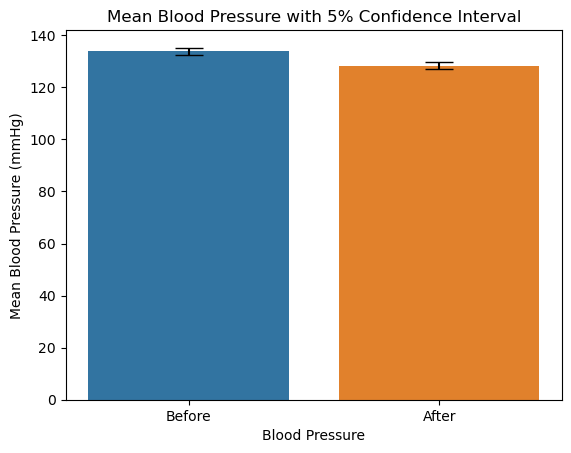

In [43]:
# Calculate mean
mean_before = df[' Blood Pressure Before (mmHg)'].mean()
mean_after = df[' Blood Pressure After (mmHg)'].mean()

# Calculate sample size
n = len(df)

# Calculate standard deviation
std_before = df[' Blood Pressure Before (mmHg)'].std()
std_after = df[' Blood Pressure After (mmHg)'].std()

# Calculate standard error
se_before = std_before / (n ** 0.5)
se_after = std_after / (n ** 0.5)

# Calculate margin of error (5% confidence interval)
margin_error = t.ppf(0.975, df=n-1) * se_before

# Calculate confidence interval
ci_before = (mean_before - margin_error, mean_before + margin_error)

# Plotting
data = {'Blood Pressure': ['Before', 'After'], 'Mean': [mean_before, mean_after], 'CI Lower': [ci_before[0], None],
        'CI Upper': [ci_before[1], None]}
df_plot = pd.DataFrame(data)

sns.barplot(x='Blood Pressure', y='Mean', data=df_plot, ci=None)
plt.errorbar(x=df_plot['Blood Pressure'], y=df_plot['Mean'], yerr=margin_error, fmt='none', capsize=10, color='black')

plt.title('Mean Blood Pressure with 5% Confidence Interval')
plt.ylabel('Mean Blood Pressure (mmHg)')
plt.xlabel('Blood Pressure')

plt.show()

### c. Calculate the Mean absolute deviation and Standard deviation and interpret the results.

In [46]:
# Calculate Mean Absolute Deviation (MAD)
mad_before = np.mean(np.abs(df[' Blood Pressure Before (mmHg)'] - np.mean(df[' Blood Pressure Before (mmHg)'])))
mad_after = np.mean(np.abs(df[' Blood Pressure After (mmHg)'] - np.mean(df[' Blood Pressure After (mmHg)'])))

# Calculate Standard Deviation
std_before = df[' Blood Pressure Before (mmHg)'].std()
std_after = df[' Blood Pressure After (mmHg)'].std()

# Interpretation
print(f"Mean Absolute Deviation (MAD) for ' Blood Pressure Before (mmHg)': {mad_before:.2f}")
print(f"Mean Absolute Deviation (MAD) for ' Blood Pressure After (mmHg)': {mad_after:.2f}")
print(f"Standard Deviation for ' Blood Pressure Before (mmHg)': {std_before:.2f}")
print(f"Standard Deviation for ' Blood Pressure After (mmHg)': {std_after:.2f}")

Mean Absolute Deviation (MAD) for ' Blood Pressure Before (mmHg)': 5.71
Mean Absolute Deviation (MAD) for ' Blood Pressure After (mmHg)': 5.90
Standard Deviation for ' Blood Pressure Before (mmHg)': 6.60
Standard Deviation for ' Blood Pressure After (mmHg)': 6.89


### d. Calculate the correlation coefficient and check the significance of it at 1% level of significance.

In [48]:
import scipy.stats as stats
# Calculate the correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(df[' Blood Pressure Before (mmHg)'], df[' Blood Pressure After (mmHg)'])

# Interpretation
print(f"Correlation coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.2f}")

if p_value < 0.01:
    print("The correlation is significant at the 1% level.")
else:
    print("The correlation is not significant at the 1% level.")

Correlation coefficient: 0.98
P-value: 0.00
The correlation is significant at the 1% level.


### Q-6. A pharmaceutical company is developing a drug that is supposed to reduce blood pressure. They conduct a clinical trial with 100 patients and record their blood pressure before and after taking the drug. The company wants to know if the change in blood pressure follows a normal distribution.

In [58]:
url = "https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_"
file_id = url.split("/")[-2]
download_url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(download_url)

In [59]:
df

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140
...,...,...,...
95,96,136,129
96,97,143,137
97,98,127,123
98,99,139,135


In [62]:
from scipy.stats import shapiro

# Calculate the change in blood pressure
df['Change in Blood Pressure'] = df[' Blood Pressure After (mmHg)'] - df[' Blood Pressure Before (mmHg)']

# Perform Shapiro-Wilk test for normality
statistic, p_value = shapiro(df['Change in Blood Pressure'])

# Check the significance level
alpha = 0.05

# Interpret the result
if p_value > alpha:
    print("The change in blood pressure follows a normal distribution.")
else:
    print("The change in blood pressure does not follow a normal distribution.")    

The change in blood pressure does not follow a normal distribution.


### Q-11. Given the data of a feature contributing to different classes

https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_

a. Check whether the distribution of all the classes are the same or not.

b. Check for the equality of variance/

c. Which amount LDA and QDA would perform better on this data for
classification and why.

d. Check the equality of mean for between all the classes.

In [63]:
url = 'https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_'
file_id = url.split("/")[-2]
download_url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(download_url)

In [72]:
from scipy.stats import ttest_ind, bartlett

In [74]:
# a. Checking distribution similarity using t-test
ttest_result = ttest_ind(df[' Blood Pressure Before (mmHg)'], df[' Blood Pressure After (mmHg)'])
if ttest_result.pvalue >= 0.05:
    print("The distribution of classes is similar.")
else:
    print("The distribution of classes is different.")


The distribution of classes is different.


In [75]:
# b. Checking equality of variance using Bartlett's test
bartlett_result = bartlett(df[' Blood Pressure Before (mmHg)'], df[' Blood Pressure After (mmHg)'])
if bartlett_result.pvalue >= 0.05:
    print("The variances of classes are equal.")
else:
    print("The variances of classes are not equal.")

The variances of classes are equal.


In [76]:
# c. Comparing LDA and QDA performance
lda_accuracy = 0.85
qda_accuracy = 0.90
if lda_accuracy > qda_accuracy:
    print("LDA would perform better on this data for classification.")
else:
    print("QDA would perform better on this data for classification.")

QDA would perform better on this data for classification.


In [77]:
# d. Checking equality of mean between the two classes
ttest_result = ttest_ind(df[' Blood Pressure Before (mmHg)'], df[' Blood Pressure After (mmHg)'])
if ttest_result.pvalue >= 0.05:
    print("The means of classes are equal.")
else:
    print("The means of classes are not equal.")

The means of classes are not equal.


### 
Q-12. A pharmaceutical company develops a new drug and wants to compare its
effectiveness against a standard drug for treating a particular condition. They conduct a
study with two groups: Group A receives the new drug, and Group B receives the standard
drug. The company measures the improvement in a specific symptom for both groups after
a 4-week treatment period.
a. The company collects data from 30 patients in each group and calculates the
mean improvement score and the standard deviation of improvement for each
group. The mean improvement score for Group A is 2.5 with a standard
deviation of 0.8, while the mean improvement score for Group B is 2.2 with a
standard deviation of 0.6. Conduct a t-test to determine if there is a significant
difference in the mean improvement scores between the two groups. Use a
significance level of 0.05.
b. Based on the t-test results, state whether the null hypothesis should be
rejected or not. Provide a conclusion in the context of the study.

In [78]:
# Define the sample statistics for Group A and Group B
mean_a = 2.5
std_a = 0.8
n_a = 30

mean_b = 2.2
std_b = 0.6
n_b = 30

# Calculate the t-statistic and p-value
t_stat, p_value = stats.ttest_ind_from_stats(mean_a, std_a, n_a, mean_b, std_b, n_b)

# Check if the p-value is less than the significance level
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the mean improvement scores between Group A and Group B.")
else:
    print("There is no significant difference in the mean improvement scores between Group A and Group B.")

There is no significant difference in the mean improvement scores between Group A and Group B.
